In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
'''
import math
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
'''

'\nimport math\nfrom sklearn.preprocessing import Normalizer\nfrom sklearn.metrics import accuracy_score\n'

In [2]:
np.random.seed(123)
weight1=np.random.uniform(size=3)
weight=weight1/np.sum(weight1)
means=np.random.uniform(-10,10,3)
covs=[1,1,1]

In [3]:
print("weigt=",weight,"\nmeans=",means,"\ncovs=",covs)

weigt= [0.57585137 0.23658438 0.18756425] 
means= [ 1.02629538  4.3893794  -1.5378708 ] 
covs= [1, 1, 1]


In [4]:
bb=np.zeros((999,2))
    

In [5]:
for i in range(333):
    bb[i][0]=0
    a=np.random.randn()
    bb[i][1]=a+means[0]
for i in range(333,666):
    bb[i][0]=1
    a=np.random.randn()
    bb[i][1]=a+means[1]
for i in range(666,999):
    bb[i][0]=2
    a=np.random.randn()
    bb[i][1]=a+means[2]


In [6]:
df = pd.DataFrame({"D1": bb[0:333,1], "D2": bb[333:666,1],"D3": bb[666:999,1]})


In [7]:
print("部分样本如下\n","来自分布一\n",bb[:5],"\n","来自分布二\n",bb[333:338],"\n","来自分布三\n",bb[666:671])

部分样本如下
 来自分布一
 [[ 0.         -1.40038386]
 [ 0.          0.59738275]
 [ 0.          2.29223164]
 [ 0.          0.15955498]
 [ 0.          0.34740923]] 
 来自分布二
 [[1.         2.82012327]
 [1.         3.87903652]
 [1.         3.94160797]
 [1.         5.32722969]
 [1.         4.03271633]] 
 来自分布三
 [[ 2.         -0.31779228]
 [ 2.         -1.95421608]
 [ 2.         -1.49970449]
 [ 2.         -0.90955069]
 [ 2.         -3.1423072 ]]


<AxesSubplot:title={'center':'Density Plot'}, ylabel='Frequency'>

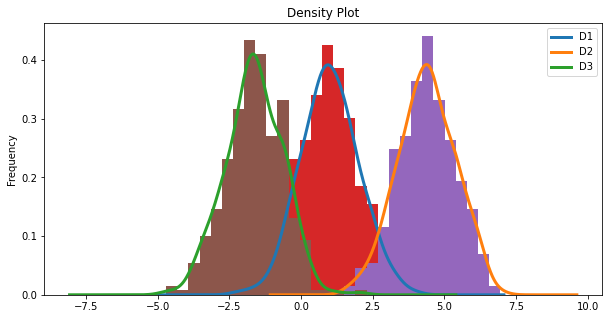

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))
df.plot(kind="density", ax=ax, linewidth=3, title="Density Plot")
df.plot(kind="hist",bins=30, ax=ax, density=True, legend=False)


In [ ]:
class EM:
    def __init__(self, prob):
        self.pro_A, self.pro_B, self.pro_C = prob

    # e_step
    def pmf(self, i):
        pro_1 = self.pro_A * math.pow(self.pro_B, data[i]) * math.pow(
            (1 - self.pro_B), 1 - data[i])
        pro_2 = (1 - self.pro_A) * math.pow(self.pro_C, data[i]) * math.pow(
            (1 - self.pro_C), 1 - data[i])
        return pro_1 / (pro_1 + pro_2)

    # m_step
    def fit(self, data):
        count = len(data)
        print('init prob:{}, {}, {}'.format(self.pro_A, self.pro_B,
                                            self.pro_C))
        for d in range(count):
            _ = yield
            _pmf = [self.pmf(k) for k in range(count)]
            pro_A = 1 / count * sum(_pmf)
            pro_B = sum([_pmf[k] * data[k] for k in range(count)]) / sum(
                [_pmf[k] for k in range(count)])
            pro_C = sum([(1 - _pmf[k]) * data[k]
                         for k in range(count)]) / sum([(1 - _pmf[k])
                                                        for k in range(count)])
            print('{}/{}  pro_a:{:.3f}, pro_b:{:.3f}, pro_c:{:.3f}'.format(
                d + 1, count, pro_A, pro_B, pro_C))
            self.pro_A = pro_A
            self.pro_B = pro_B
            self.pro_C = pro_C

In [ ]:
data=[1,1,0,1,0,0,1,0,1,1]

In [ ]:
em = EM(prob=[0.5, 0.5, 0.5])
f = em.fit(data)
next(f)